## Analysis

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [2]:
# Defining the data access path

path = r'C:\Users\efens\cf_tasks\2023-07 Instacard Basket Analysis'

# Importing the latest project data without low-activity customers

profiling_data = pd.read_pickle(os.path.join(path, '02 Data', '022 Prepared Data', 'profiling_data.pkl'))

## 01. Creating an appropriate visualization to show the distribution of profiles

In [3]:
# Exploring all column names

profiling_data.columns.tolist()

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_price',
 'spenders',
 'median_days',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 '_merge',
 'region',
 'activity_flag',
 'age_group',
 'profile']

In [4]:
profiling_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity_flag,age_group,profile
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children


## 02. Other Visualizations

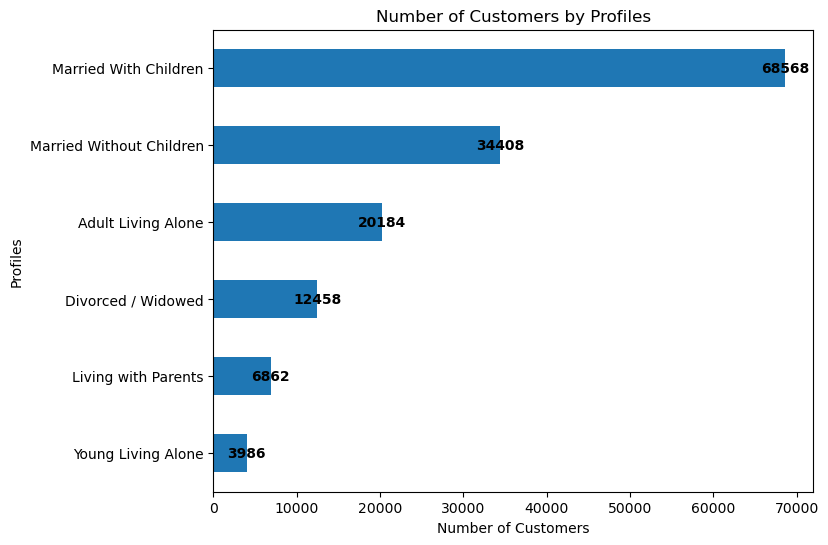

In [5]:
# Making a bar chart for profiles

# Calculate the number of customers for each profile
customer_counts = profiling_data.groupby('profile')['user_id'].nunique().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

# Plotting the bar chart
profile_counts = customer_counts.plot.barh()

# Adding title and labels to the plot
profile_counts.set_title("Number of Customers by Profiles")
profile_counts.set_xlabel("Number of Customers")
profile_counts.set_ylabel("Profiles")

# Adding counts to each bar
for index, value in enumerate(customer_counts):
    profile_counts.text(value, index, str(value), ha='center', va='center', color='black', fontsize=10, weight='bold')

# Adjust spacing for y-axis labels
plt.subplots_adjust(left=0.3)

# Showing the plot
plt.show()

In [6]:
# Exproting chart "Counts of the customers by profiles"

profile_counts.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'profile_counts.png'))

## 03. Aggregate the max, mean and min on a customer-profile lever

In [7]:
# Ecploring prices

profiling_data['prices'].describe()

count   30171424.00
mean          11.86
std          484.35
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

In [8]:
# Checking ouliers where the price is above 100$ (due to the output above, prices over 100 will be seen as outliers)

profiling_filtered = profiling_data.loc[profiling_data['prices'] < 100]

In [9]:
profiling_filtered.groupby('profile').agg({"days_since_prior_order":["min", "max", "mean"], "prices":["min", "max", "mean"]})

days_since_prior_order             prices           
                                            min   max  mean    min   max mean
profile                                                                      
Adult Living Alone                         0.00 30.00 10.43   1.00 25.00 7.78
Divorced / Widowed                         0.00 30.00 10.40   1.00 25.00 7.80
Living with Parents                        0.00 30.00 10.40   1.00 25.00 7.80
Married With Children                      0.00 30.00 10.47   1.00 25.00 7.79
Married Without Children                   0.00 30.00 10.46   1.00 25.00 7.80
Young Living Alone                         0.00 30.00 10.57   1.00 25.00 7.77

#### Which group of customers generated the maximum revenue?

In [10]:
# Group the data by 'profile' and calculate various aggregations
revenue_summary = profiling_filtered.groupby('profile').agg({'prices': ['min', 'max', 'sum'],'profile': 'count'
})

# Rename the columns for clarity
revenue_summary.columns = ['Min Price', 'Max Price', 'Sum Prices', 'Count']

# Calculate Sum Revenue divided by Count
revenue_summary['Sum Prices/Count'] = revenue_summary['Sum Prices'] / revenue_summary['Count']

# Reset the index for a cleaner display
revenue_summary = revenue_summary.reset_index()

# Print the revenue summary table
print(revenue_summary)

                    profile  Min Price  Max Price   Sum Prices     Count  \
0        Adult Living Alone       1.00      25.00  32366005.00   4157741   
1        Divorced / Widowed       1.00      25.00  20107066.50   2577446   
2       Living with Parents       1.00      25.00  11261317.30   1443901   
3     Married With Children       1.00      25.00 110245310.70  14157971   
4  Married Without Children       1.00      25.00  54777519.10   7026762   
5        Young Living Alone       1.00      25.00   6241256.30    802887   

   Sum Prices/Count  
0              7.78  
1              7.80  
2              7.80  
3              7.79  
4              7.80  
5              7.77  


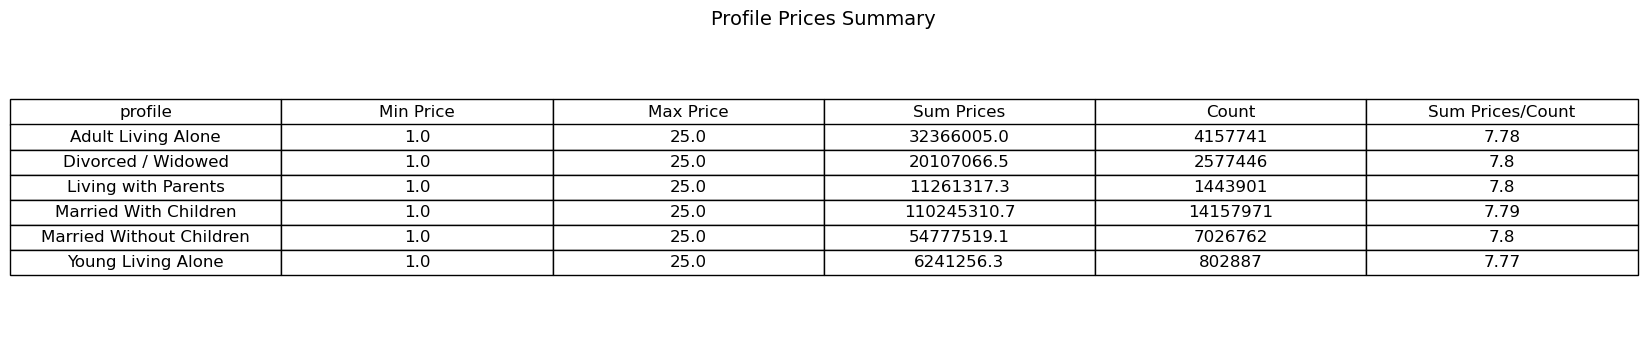

In [11]:
## Create a table visualization

revenue_summary['Sum Prices/Count'] = revenue_summary['Sum Prices/Count'].round(2)

# Set up the figure and axis
plt.figure(figsize=(14, 4))
ax = plt.gca()
ax.axis('off')

# Create a table visualization using pandas styling
table = ax.table(cellText=revenue_summary.values,
                 colLabels=revenue_summary.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

# Add a title to the table
plt.title("Profile Prices Summary", fontsize=14)

# Save the table visualization as a PNG image with the table name and path
table_name = 'profile_revenue'
plt.savefig(os.path.join(path, '04 Analysis', '041 Visualizations', f'{table_name}.png'), bbox_inches='tight', pad_inches=0.5, dpi=300)

plt.show()

## 04. Comparing the customer profiles with regions and departments

#### Comparing by region

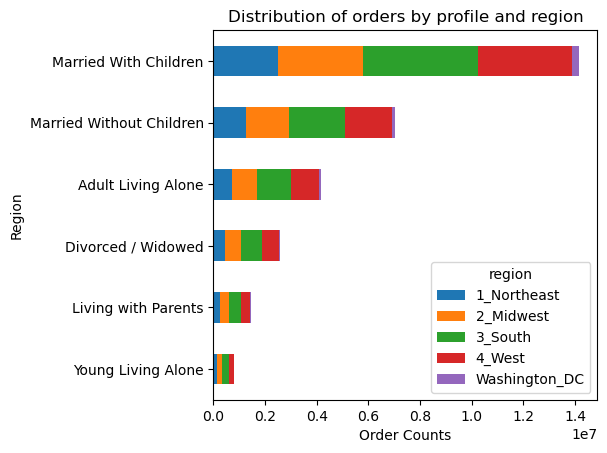

In [12]:
## Profiles by region

# Grouping profiles and regions
grouped = profiling_filtered.groupby(['profile', 'region']).size().unstack()

#Soring values
sorted_grouped = grouped.sort_values(by=list(grouped.columns), ascending=True)

#Plotting the data
bar = sorted_grouped.plot(kind='barh', stacked=True)

# Adding title and labels to the plot
bar.set_title("Distribution of orders by profile and region")
bar.set_xlabel("Order Counts")
bar.set_ylabel("Region")

# Adjust spacing for x-axis labels
plt.subplots_adjust(left=0.3)

# Showing the plot
plt.show()

In [13]:
# Exproting chart "Distribution of profiles by region"

bar.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'profile_region_orders.png'))

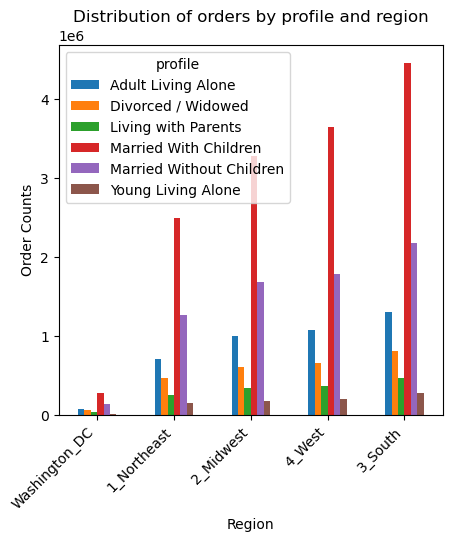

In [14]:
## Profiles by region

# Grouping profiles and regions
grouped = profiling_filtered.groupby(['region', 'profile']).size().unstack()

#Soring values
sorted_grouped = grouped.sort_values(by=list(grouped.columns), ascending=True)

#Plotting the data
bar_1 = sorted_grouped.plot(kind='bar', stacked=False, linewidth=20)

# Adding title and labels to the plot
bar_1.set_title("Distribution of orders by profile and region")
bar_1.set_xlabel("Region")
bar_1.set_ylabel("Order Counts")

# Adjust spacing for x-axis labels
plt.subplots_adjust(left=0.3)

# Rotation
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.show()

In [15]:
# Exproting chart "Distribution of profiles by region"

bar_1.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'profile_reg_ord_compare.png'))

#### Different behavior across departments

In [16]:
# Importing the department names

departments = pd.read_csv(os.path.join(path, '02 Data', '022 Prepared Data', 'departments_transposed.csv'))

In [17]:
# Merge the profiling_filtered DataFrame with the departments DataFrame based on department_id
merged_data = profiling_filtered.merge(departments, on='department_id', how='left')

In [18]:
merged_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity_flag,age_group,profile,department
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages


In [19]:
merged_data['department'].value_counts()

produce            8859944
dairy eggs         5048724
snacks             2699351
beverages          2507241
frozen             2059325
pantry             1732114
bakery             1092488
canned goods        982041
deli                978050
dry goods pasta     797683
household           678295
meat seafood        655729
breakfast           653419
personal care       411807
babies              403066
international       248722
alcohol             139573
pets                 90339
missing              62541
other                33415
bulk                 32841
Name: department, dtype: int64

In [20]:
# Exproting chart "Distribution of profiles by region"

bar.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'department_profile.png'))

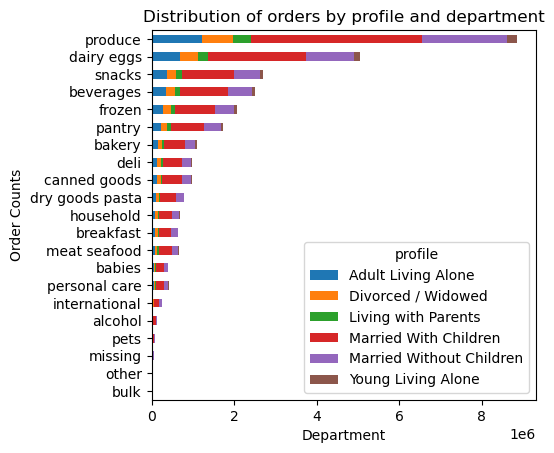

In [21]:
## Profiles by departments

# Grouping profiles and regions
grouped = merged_data.groupby(['department', 'profile']).size().unstack()

#Soring values
sorted_grouped = grouped.sort_values(by=list(grouped.columns), ascending=True)

#Plotting the data
bar = sorted_grouped.plot(kind='barh', stacked=True)

# Adding title and labels to the plot
bar.set_title("Distribution of orders by profile and department")
bar.set_xlabel("Department")
bar.set_ylabel("Order Counts")

# Adjust spacing for x-axis labels
plt.subplots_adjust(left=0.3)

# Showing the plot
plt.show()

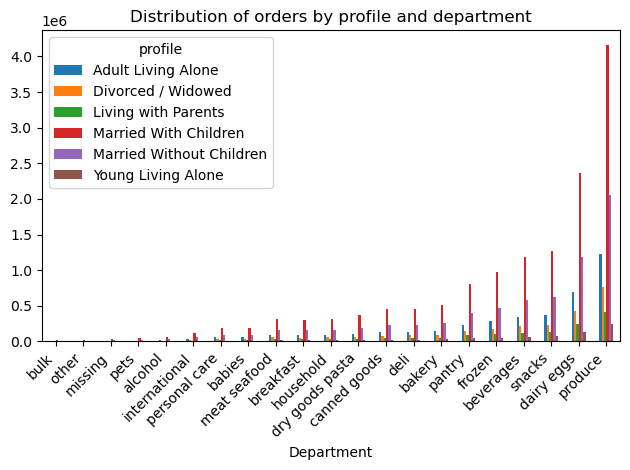

In [22]:
# Plotting the data as a clustered bar chart
bar_clust = sorted_grouped.plot(kind='bar', stacked=False, linewidth=6)


# Adding title and labels to the plot
bar_clust.set_title("Distribution of orders by profile and department")
bar_clust.set_xlabel("Department")
bar.set_ylabel("Order Counts")
bar_clust
# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.tight_layout()
plt.show()

In [23]:
# Exproting chart "Distribution of profiles by region"

bar_clust.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'department_profile_clustered.png'))

## 05. Exporting df

In [24]:
# Exproting as a separate df

merged_data.to_pickle(os.path.join(path, '02 Data','022 Prepared Data', 'profiling_data_filtered.pkl'))

## 06. Additional analysis for answering key questions:

#### Which departments have the highest frequency of product orders?

In [25]:
merged_data['department'].value_counts()

produce            8859944
dairy eggs         5048724
snacks             2699351
beverages          2507241
frozen             2059325
pantry             1732114
bakery             1092488
canned goods        982041
deli                978050
dry goods pasta     797683
household           678295
meat seafood        655729
breakfast           653419
personal care       411807
babies              403066
international       248722
alcohol             139573
pets                 90339
missing              62541
other                33415
bulk                 32841
Name: department, dtype: int64

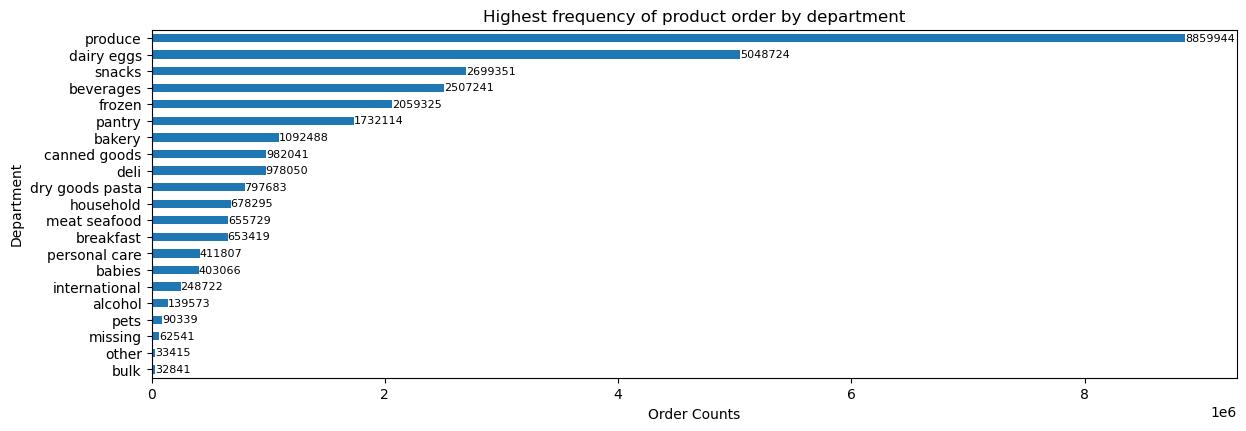

In [26]:
## Departments + frequency orders

#Soring values
depart_freq = merged_data['department'].value_counts(ascending=True)

plt.figure(figsize=(14, 6))

#Plotting the data
bar_df = depart_freq.plot(kind='barh', stacked=True)

# Adding title and labels to the plot
bar_df.set_title("Highest frequency of product order by department")
bar_df.set_xlabel("Order Counts")
bar_df.set_ylabel("Department")

# Adding counts to each bar
for index, value in enumerate(depart_freq):
    bar_df.text(value, index, str(value), ha='left', va='center', color='black', fontsize=8)

# Adjust spacing for x-axis labels
plt.subplots_adjust(bottom=0.3)

# Showing the plot
plt.show()

In [27]:
# Exproting chart

bar_df.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'depart_freq_sales.png'))

#### Are there differences in ordering habits based on a customer’s loyalty status?

<Figure size 10000x10000 with 0 Axes>

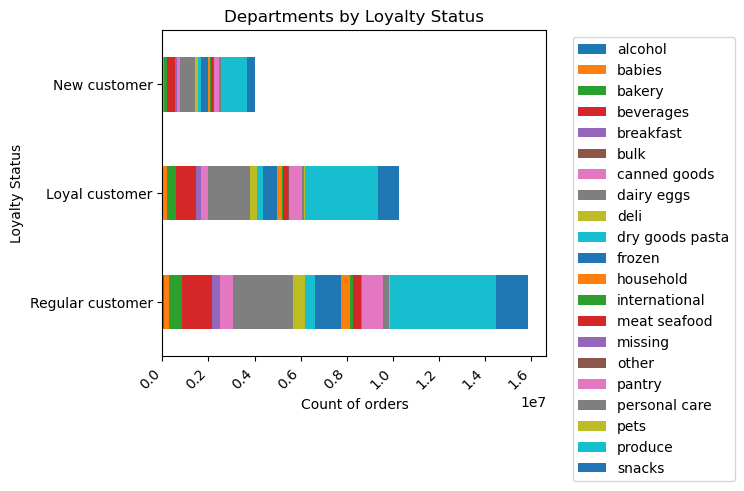

In [28]:
# Calculate value counts for loyalty_flag
loyalty_counts = merged_data['loyalty_flag'].value_counts()

# Calculate top 3 departments based on loyalty_flag
top_departments = merged_data.groupby('loyalty_flag')['department'].value_counts().unstack().fillna(0)
top_departments['total'] = top_departments.sum(axis=1)
top_departments = top_departments.sort_values(by='total', ascending=False).head(3)

# Plotting the data
plt.figure(figsize=(100, 100))

# Plot top 3 departments by loyalty_flag
ax = top_departments.drop(columns=['total']).plot(kind='barh', stacked=True)
plt.title('Departments by Loyalty Status')
plt.xlabel('Count of orders')
plt.ylabel('Loyalty Status')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Move the legend outside of the bar chart
ax.legend(bbox_to_anchor=(1.05, 1), loc='best')

# Adjust the subplot parameters
plt.subplots_adjust(left=0.3, bottom=0.2)

plt.show()

In [29]:
# Exproting chart

ax.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'depart_loyal_sales.png'))

#### How many customers are in each profile and how many revenue they generated?

In [30]:
# Group the data by 'profile' and calculate the sum of user_id and sum of prices in each profile
profile_summary = merged_data.groupby('profile').agg(
    User_Count=('user_id', 'nunique'),
    Revenue=('prices', 'sum')
)

# Reset the index for a cleaner display
profile_summary = profile_summary.reset_index()

# Print the profile summary table
print(profile_summary)


                    profile  User_Count      Revenue
0        Adult Living Alone       20184  32366005.00
1        Divorced / Widowed       12458  20107066.50
2       Living with Parents        6862  11261317.30
3     Married With Children       68568 110245310.70
4  Married Without Children       34408  54777519.10
5        Young Living Alone        3986   6241256.30


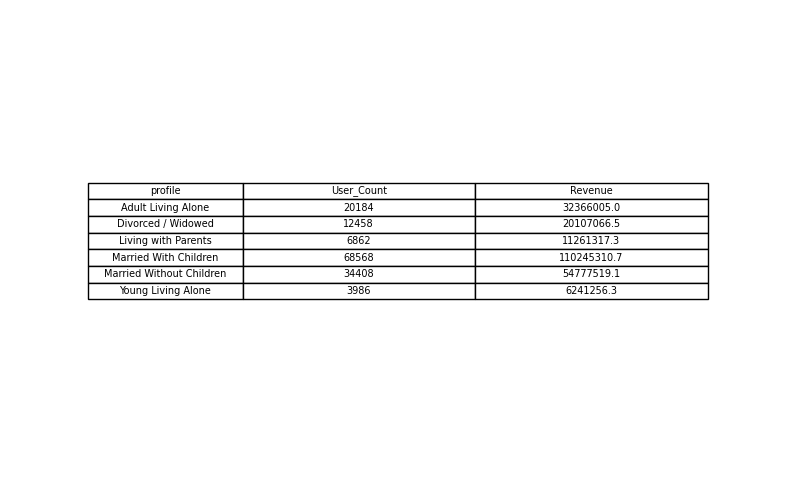

In [31]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Create a table-like visualization using matplotlib
table_data = []
for row in profile_summary.iterrows():
    table_data.append(row[1].tolist())
    
ax.table(cellText=table_data,
         colLabels=profile_summary.columns,
         cellLoc='center', loc='center', colWidths=[0.2, 0.3, 0.3], fontsize=8)

# Show the plot
plt.show()

In [32]:
# Exproting chart

ax.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'table_profiles.png'))

#### Are there differences in ordering habits based on a customer’s loyalty status?

In [33]:
merged_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity_flag,age_group,profile,department
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South,high-activity customer,25-40,Married With Children,beverages


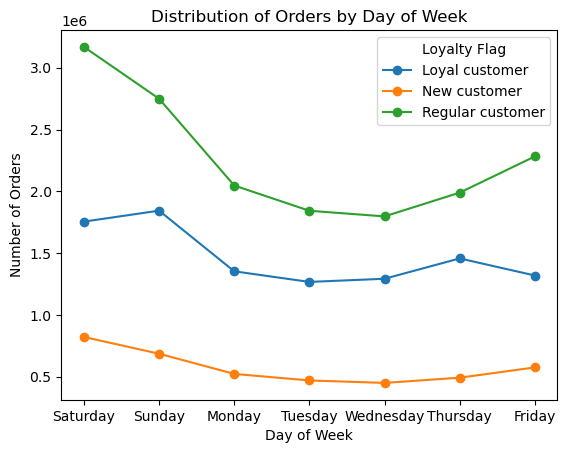

In [39]:
# Group by 'loyalty_flag' and 'orders_day_of_week', then perform value counts
grouped_data = merged_data.groupby(['loyalty_flag', 'orders_day_of_week']).size()

# Convert the multi-index to columns for easier plotting
grouped_data = grouped_data.unstack(level='loyalty_flag')

# Create the line chart
ax = grouped_data.plot(kind='line', marker='o')

# Customize the plot
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7))
plt.legend(title='Loyalty Flag')

# Changing the tick labels for the x-axis
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax.set_xticklabels(day_labels, rotation=0)

# Display the plot
plt.show()

In [38]:
# Exproting chart

ax.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'oders_day_loyal.png'))

#### Distribution of Orders by Day Time

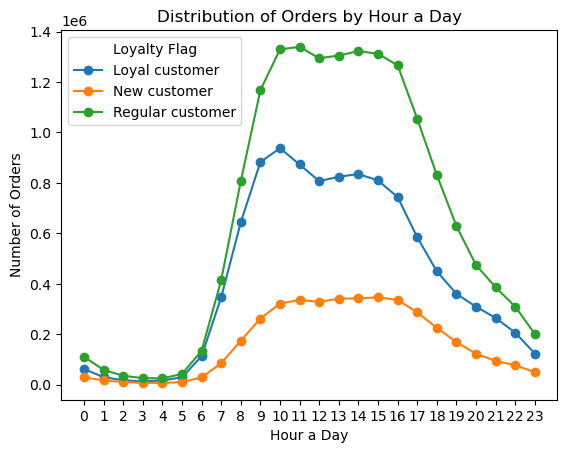

In [44]:
# Group by 'loyalty_flag' and 'order_hour_of_day', then perform value counts
grouped_data = merged_data.groupby(['loyalty_flag', 'prices]).size()

# Convert the multi-index to columns for easier plotting
grouped_data = grouped_data.unstack(level='loyalty_flag')

# Create the line chart
ax = grouped_data.plot(kind='line', marker='o')

# Customize the plot
plt.title('Distribution of Orders by Hour a Day')
plt.xlabel('Hour a Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.legend(title='Loyalty Flag')

# Display the plot
plt.show()

In [45]:
# Exproting chart

ax.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'oders_hour_loyal.png'))

#### Differences by customer profiles

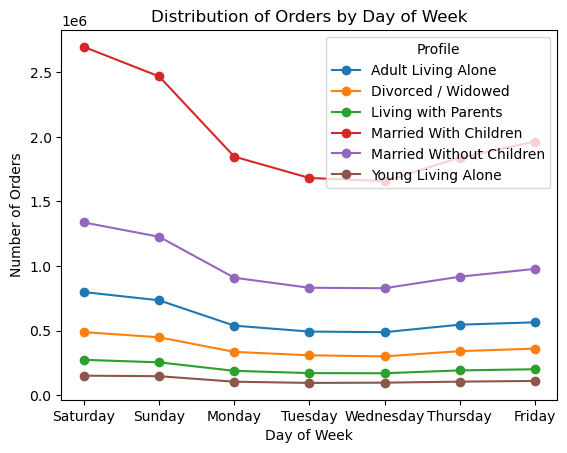

In [47]:
# Group by 'profile' and 'orders_day_of_week', then perform value counts
grouped_data = merged_data.groupby(['profile', 'orders_day_of_week']).size()

# Convert the multi-index to columns for easier plotting
grouped_data = grouped_data.unstack(level='profile')

# Create the line chart
ax = grouped_data.plot(kind='line', marker='o')

# Customize the plot
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7))
plt.legend(title='Profile')

# Changing the tick labels for the x-axis
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax.set_xticklabels(day_labels, rotation=0)

# Display the plot
plt.show()

In [48]:
# Exproting chart

ax.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'distr_profile_day.png'))

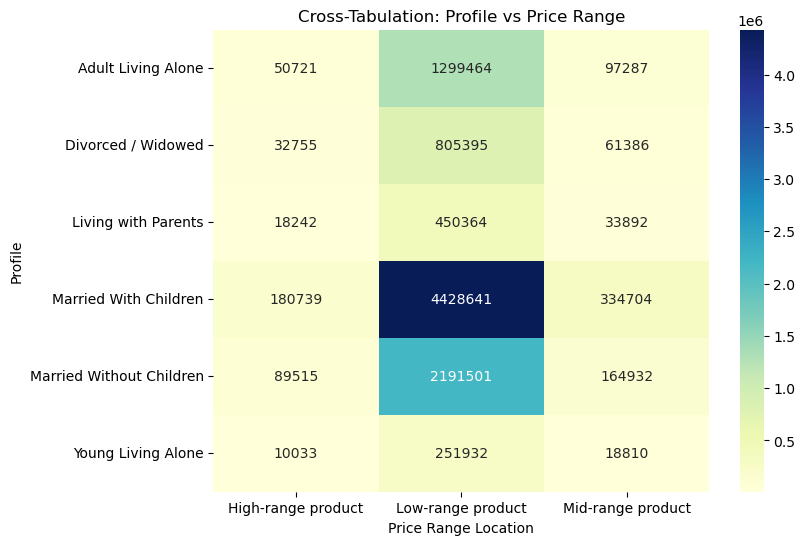

In [54]:
# Create a cross-tabulation (crosstab) of the variables
cross_tab = pd.crosstab(merged_data['profile'], merged_data['price_range_loc'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Price Range Location')
plt.ylabel('Profile')
plt.title('Cross-Tabulation: Profile vs Price Range')
plt.show()

In [59]:
# Exproting chart

plt.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'cross_price_profile.png'))

<Figure size 640x480 with 0 Axes>